In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from Final_Data_Prep import get_train_val_test
from Final_Data_Prep import downsample

In [2]:
total_df = pd.read_pickle('total_df.pckl.gz', compression = 'gzip')
xtrain, xval, xtest, ytrain, yval, ytest = get_train_val_test (total_df,  0.7, 0.15, 0.15)

training_df = xtrain.join(ytrain)

# passing 50 to downsample function means training set will have 50% positive cases
downsampled_training_df = downsample(training_df, 50)

X_train_down = downsampled_training_df.drop('MHI', axis=1)
y_train_down = downsampled_training_df['MHI']

In [5]:
'''
Random Forest Baseline
'''
non_baseline = ['402', 'weekday', 'incident_length', 'age_over_100', 'age_unknown', 'latitude', 'longitude',
                'season_fall', 'season_spring', 'season_summer', 'season_winter']

base_X_train_down = X_train_down.drop(columns=non_baseline)
base_X_val = xval.drop(columns=non_baseline)

clf = RandomForestClassifier(random_state=0).fit(base_X_train_down,y_train_down)
y_pred_proba = clf.predict_proba(base_X_val)
y_pred = clf.predict(base_X_val)
fpr, tpr, thresholds = metrics.roc_curve(yval, y_pred_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)
print('AUC:', roc_auc)
print('Sensitivity:', metrics.recall_score(yval, y_pred))

AUC: 0.7841840017929523
Sensitivity: 0.7405541561712846


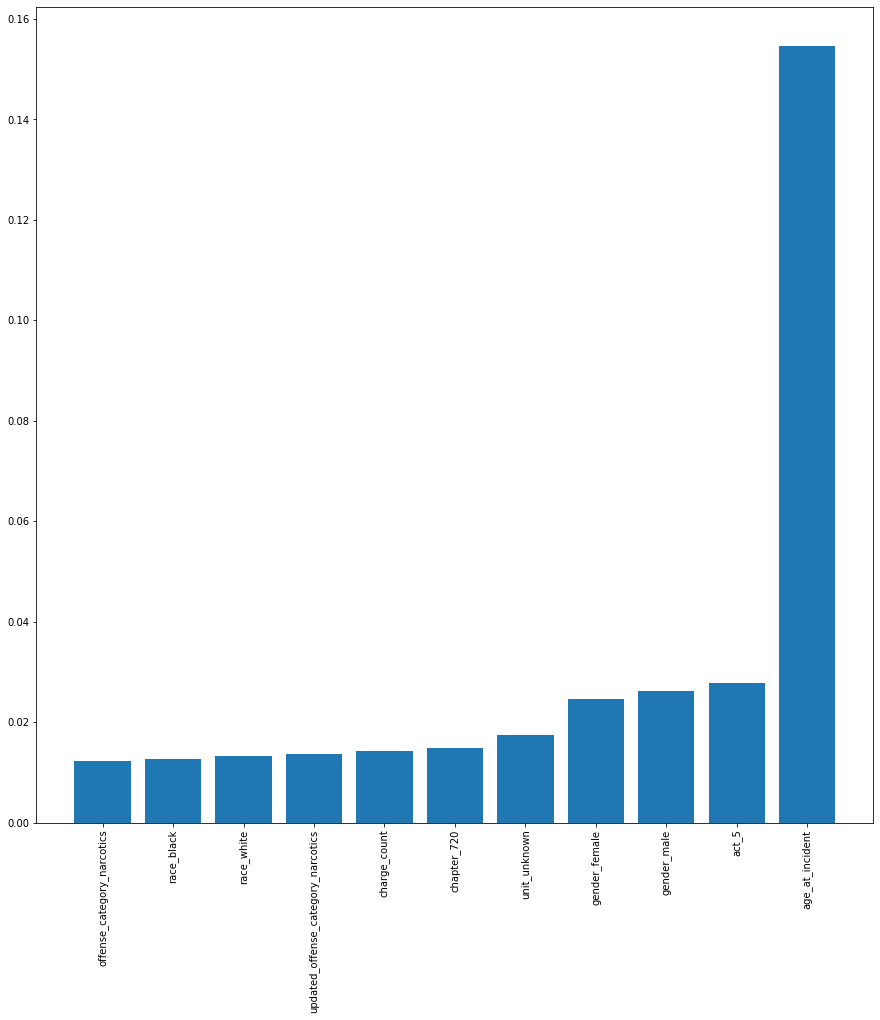

In [9]:
'''
Feature Importance Plot for Random Forest
'''

ftimp = [x for x in zip(base_X_train_down.columns, clf.feature_importances_)] #list of tuples
ftimp.sort(key = lambda x: x[1]) #sorting based on feature importance
ftimp = [x for x in ftimp if x[1] > 0.01] #theres a ton above 0
plt.figure(figsize=(15,15))
plt.bar(*zip(*ftimp)) #unzipping ftimp
plt.xticks(rotation='vertical')
plt.show()